# Hastie Data - 2 Class

In [1]:
from sklearn.datasets import make_hastie_10_2

x, y = make_hastie_10_2(n_samples=6000, random_state=42)

In [2]:
(y>=0).mean()

0.5031666666666667

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.25, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    random_state=42,
    n_jobs=-1,
)

clf.fit(x_train, y_train)
y_pred_proba = clf.predict_proba(x_test)[:,1]

In [15]:
y_pred_proba.shape

(1500,)

In [16]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thr = roc_curve(y_test, y_pred_proba)

In [17]:
df_thr = pd.DataFrame(
    {
        'Threshold': thr,
        'True Positive Rate': tpr,
        'False Positive Rate': fpr,
    }
)

df_thr[
   df_thr['Threshold'] < 1
].set_index('Threshold')


,True Positive Rate,False Positive Rate
Threshold,,
0.98,0.001326,0.000000
0.97,0.006631,0.000000
0.96,0.010610,0.001340
0.95,0.015915,0.001340
0.94,0.023873,0.002681
...,...,...
0.04,1.000000,0.762735
0.03,1.000000,0.800268
0.02,1.000000,0.845845


In [9]:
auc_values = auc(fpr, tpr)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


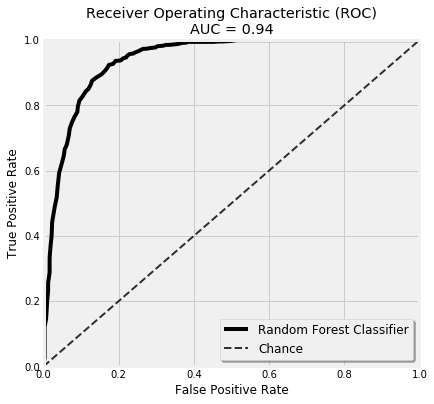

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=False)

pd.DataFrame(
    {
        'FPR': fpr,
        'TPR': tpr
    }
).set_index('FPR')['TPR'].plot(
    title=f'Receiver Operating Characteristic (ROC)\nAUC = {auc_values:.2f}',
    label='Random Forest Classifier',
    kind='line',
    xlim=(0,1),
    ylim=(0,1),
    color='k',
    ax=ax
)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)


ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()

# ROC Curves

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

bootstrap_options = [True, False]

for bootstrap_option in bootstrap_options:
    
    clf = RandomForestClassifier(
        n_estimators=200,
        bootstrap=bootstrap_option,
        n_jobs=-1,
    )

    clf.fit(x_train, y_train)
    y_pred_proba = clf.predict_proba(x_test)[:,1]
    
    fpr, tpr, thr = roc_curve(y_test, y_pred_proba)

    auc_values = auc(fpr, tpr)
    
    print(f'AUC @ bootstrap = {bootstrap_option}; {auc_values:.3f}')

AUC @ bootstrap = True; 0.939
AUC @ bootstrap = False; 0.927


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


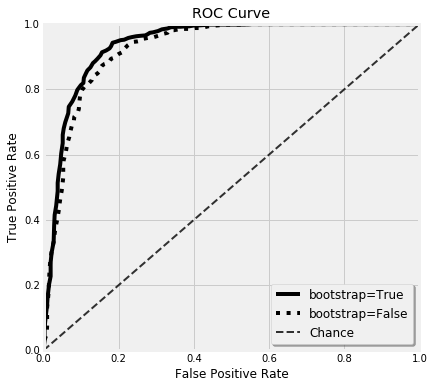

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=False)

for i, bootstrap_option in enumerate(bootstrap_options):
    
    clf = RandomForestClassifier(
        n_estimators=100,
        bootstrap=bootstrap_option,
        n_jobs=-1,
    )

    clf.fit(x_train, y_train)
    y_pred_proba = clf.predict_proba(x_test)[:,1]
    
    fpr, tpr, thr = roc_curve(y_test, y_pred_proba)

    auc_values = auc(fpr, tpr)
    
    pd.DataFrame(
        {
            'FPR': fpr,
            'TPR': tpr
        }
    ).set_index('FPR')['TPR'].plot(
        title=f'ROC Curve',
        label=f'bootstrap={bootstrap_option}',
        kind='line',
        xlim=(0,1),
        ylim=(0,1),
        color='k',
        linestyle=['-', ':'][i],
        ax=ax
    )

    if i == 1:
        ax.plot(
            [0, 1], [0, 1], 
            linestyle='--', 
            lw=2, color='k',
            label='Chance', alpha=.8
        )

    ax.legend(ncol=1, fontsize='large', shadow=True)

    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

fig.show()

# GradientBoostingClassifier

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


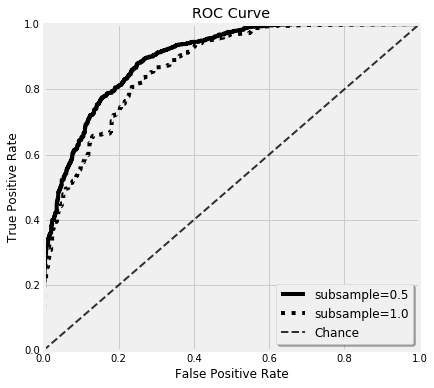

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=False)

subsample_options = [0.5, 1.0]

for i, subsample_option in enumerate(subsample_options):
    
    clf = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.01,
        subsample=subsample_option,
    )

    clf.fit(x_train, y_train)
    y_pred_proba = clf.predict_proba(x_test)[:,1]
    
    fpr, tpr, thr = roc_curve(y_test, y_pred_proba)

    auc_values = auc(fpr, tpr)
    
    pd.DataFrame(
        {
            'FPR': fpr,
            'TPR': tpr
        }
    ).set_index('FPR')['TPR'].plot(
        title=f'ROC Curve',
        label=f'subsample={subsample_option}',
        kind='line',
        xlim=(0,1),
        ylim=(0,1),
        color='k',
        linestyle=['-', ':'][i],
        ax=ax
    )

    if i == 1:
        ax.plot(
            [0, 1], [0, 1], 
            linestyle='--', 
            lw=2, color='k',
            label='Chance', alpha=.8
        )

    ax.legend(ncol=1, fontsize='large', shadow=True)

    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

fig.show()